<a href="https://colab.research.google.com/github/MuhammadAwon/backyard-projects/blob/main/intro-to-deep-learning/neural_network_regression/01a_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up your initution.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [ ]:
# Create custom dataset
X = np.arange(1, 1000, 5, dtype=np.float32)
y = np.arange(51, 1050, 5, dtype=np.float32)
X, y

(array([  1.,   6.,  11.,  16.,  21.,  26.,  31.,  36.,  41.,  46.,  51.,
         56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101., 106.,
        111., 116., 121., 126., 131., 136., 141., 146., 151., 156., 161.,
        166., 171., 176., 181., 186., 191., 196., 201., 206., 211., 216.,
        221., 226., 231., 236., 241., 246., 251., 256., 261., 266., 271.,
        276., 281., 286., 291., 296., 301., 306., 311., 316., 321., 326.,
        331., 336., 341., 346., 351., 356., 361., 366., 371., 376., 381.,
        386., 391., 396., 401., 406., 411., 416., 421., 426., 431., 436.,
        441., 446., 451., 456., 461., 466., 471., 476., 481., 486., 491.,
        496., 501., 506., 511., 516., 521., 526., 531., 536., 541., 546.,
        551., 556., 561., 566., 571., 576., 581., 586., 591., 596., 601.,
        606., 611., 616., 621., 626., 631., 636., 641., 646., 651., 656.,
        661., 666., 671., 676., 681., 686., 691., 696., 701., 706., 711.,
        716., 721., 726., 731., 736., 

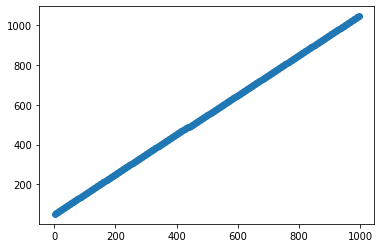

In [ ]:
# Plot the linear relationship between X and y
plt.scatter(X, y);

---
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [ ]:
X, y

(array([426., 856., 216., 276., 151.,  71.,  81., 321., 451., 696.,  46.,
        966., 776., 316., 791.,  36., 626., 131.,  76., 831., 591.,  51.,
        801., 421., 921., 401., 566., 721., 876., 581., 971.,  56., 541.,
        671., 226., 241., 406., 766., 551., 376., 396., 506., 661., 436.,
        171., 281., 141., 691., 636., 461., 526., 716., 976., 686.,  91.,
        731.,  86.,   6., 741., 411., 391., 521., 871., 911., 256., 351.,
        501., 941., 826.,  16., 206., 781., 486., 516., 246., 156., 286.,
        176., 236., 666.,  26., 796., 846., 446., 651., 761., 481., 621.,
        946., 956., 951., 116., 496., 601., 201., 431.,   1., 926., 916.,
        266., 861., 961., 986., 306., 656., 331., 146., 511., 341., 261.,
        466., 891., 631., 646., 606., 996., 381., 536., 336., 101., 471.,
        221., 771., 786., 886., 561., 531., 726., 366.,  21., 231., 456.,
        881., 326., 556., 806., 571., 931., 476., 346., 866., 361., 121.,
        296., 251., 271., 181.,  96., 

Split into train/test set

In [ ]:
# Split the data into 80% train and 20% test set
X_train = X[:160]
X_test = X[160:]

y_train = y[:160]
y_test = y[160:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(160, 40, 160, 40)

Visualize the train and test set

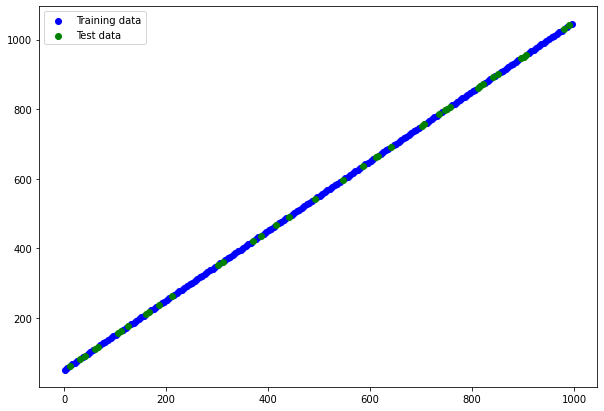

In [ ]:
# Configure the figure size
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Test data')
# Show legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (4 layers)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(50),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Fit the model
model.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Check the test data
X_test

array([ 41., 906.,  61., 821., 106., 616., 736., 641., 991., 896., 546.,
       811., 701., 851., 301., 491., 186., 441., 611.,  66., 161., 751.,
       111., 211., 416.,  31., 371., 816., 586., 981., 166., 901., 756.,
       706., 746., 311., 126., 386., 841.,  11.], dtype=float32)

In [ ]:
# Make prediction on test data, since the relationshipe is y = X + 50
y_pred = model.predict(X_test).squeeze()
y_pred

array([  54.30372 ,  959.3095  ,   75.2287  ,  870.37836 ,  122.309906,
        655.8972  ,  781.447   ,  682.05334 , 1048.2405  ,  948.847   ,
        582.65967 ,  859.9157  ,  744.8283  ,  901.76575 ,  326.32858 ,
        525.116   ,  206.00984 ,  472.80347 ,  650.6659  ,   80.459946,
        179.85365 ,  797.1408  ,  127.54117 ,  232.16609 ,  446.64728 ,
         43.84122 ,  399.566   ,  865.14703 ,  624.50964 , 1037.7781  ,
        185.08485 ,  954.0783  ,  802.372   ,  750.0596  ,  791.9096  ,
        336.79105 ,  143.23491 ,  415.25977 ,  891.3032  ,   22.916235],
      dtype=float32)

In [ ]:
# Evaluate on test data
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 13ms/step - loss: 16.4469 - mae: 16.4469


[16.446903228759766, 16.446903228759766]

Find MAE using tensorflow bulit-in function for finding the error

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=16.446894>

Visualize data and model predictions

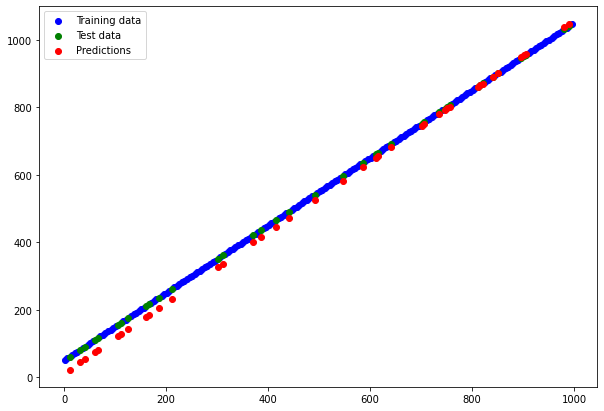

In [ ]:
# Configure the plot size
plt.figure(figsize=(10,7))
# Plot the training set in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot the test set in green
plt.scatter(X_test, y_test, c='g', label='Test data')
# Plot the model predictions in red
plt.scatter(X_test, y_pred, c='r', label='Predictions')
# Show legend
plt.legend();

---
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

In [ ]:
# Import data and read into csv
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Number of rows & columns
insurance.shape

(1338, 7)

In [ ]:
# Get information about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Get short summary of the data
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Find null values if there is any
insurance.isnull().any().sum()

0

In [ ]:
# Separate the features and target variable
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Split the data into training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# Normalize the numeric columns and one-hot encode the categorical columns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

# Fit column transformer only on training data to avoid data leakage
ct.fit(X_train)

# Transform training and test data
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [ ]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


In [ ]:
pd.DataFrame(X_test_norm)

,0,1,2,3,4,5,6,7,8,9,10
0,0.586957,0.247915,0.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.378262,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.293920,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,0.263250,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021739,0.429379,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
263,0.978261,0.514662,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
264,0.869565,0.301587,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
265,0.434783,0.324590,0.2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
266,0.782609,0.846112,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_norm.shape, y_train.shape

((1070, 11), (1070,))

First experiment:
* Building a larger model (how does one with 4 dense layers go?).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (4 layers: 100, 50, 10, and 1 node)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, input_shape=(X_train_norm.shape[-1],)),
                             tf.keras.layers.Dense(50),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model (optimizer Adam)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [ ]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


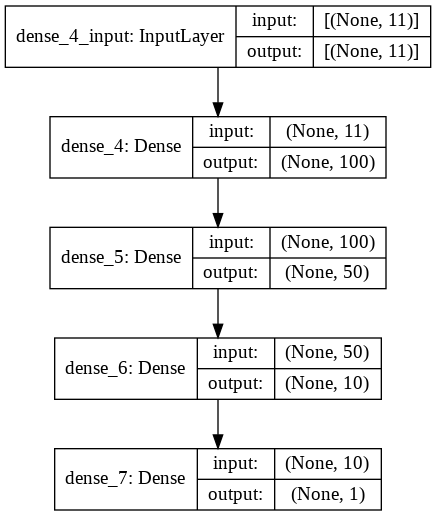

In [ ]:
# Plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# Fit the model for training (200 epochs)
history = model.fit(X_train_norm, y_train, epochs=200, verbose=0)

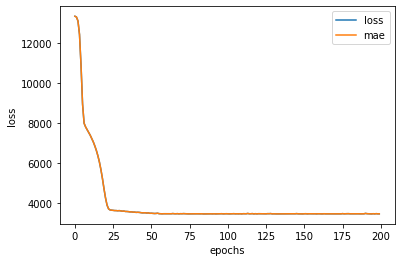

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
# Evaluate the predictions on test set
_, mae = model.evaluate(X_test_norm, y_test, verbose=0)
mae

3179.83740234375

Second experiment:

* Increasing the number of units in each layer.
* Everything else stays the same as in first model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model_2 (4 layers but increase the number of nodes)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(150, input_shape=(X_train_norm.shape[-1],)),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [ ]:
# Model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               1800      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_2 = model_2.fit(X_train_norm, y_train, epochs=200, verbose=0)

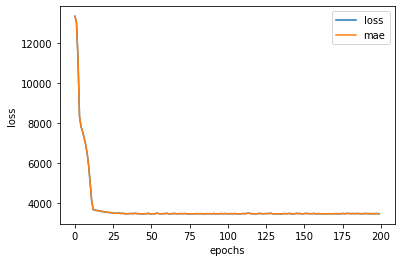

In [ ]:
# Plot model_2 history
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
# Evaluation
_, mae_2 = model_2.evaluate(X_test_norm, y_test, verbose=0)
mae_2

3174.941162109375

Third experiment:

* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* Everything else stays as first model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model (same as first model)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile model (optimizer Adam(lr=0.01))
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

In [ ]:
# Fit the model
history_3 = model_3.fit(X_train_norm, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12122.4551 - mae: 12122.4551
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7648.9434 - mae: 7648.9434
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 5989.5879 - mae: 5989.5879
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3933.2312 - mae: 3933.2312
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3631.3118 - mae: 3631.3118
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3640.4832 - mae: 3640.4832
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3561.0747 - mae: 3561.0747
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3656.8723 - mae: 3656.8723
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3599.5771 - mae: 3599.5771
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3555.4492 - mae: 3555.44

Text(0, 0.5, 'loss')

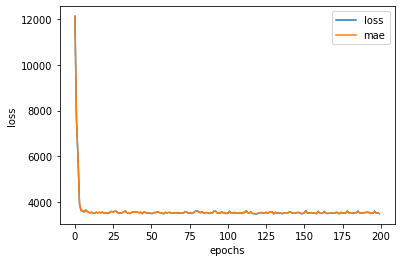

In [ ]:
# Plot history
pd.DataFrame(history_3.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluation
_, mae_3 = model.evaluate(X_test_norm, y_test)
mae_3

9/9 [==============================] - 0s 2ms/step - loss: 3179.8374 - mae: 3179.8374


3179.83740234375

Fourth experiment:

* What happens if you train for longer (say 300 epochs instead of 200)?
* Rest is same as first model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model_4
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
history_4 = model_4.fit(X_train_norm, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13341.6279 - mae: 13341.6279
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13303.0576 - mae: 13303.0576
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 13104.0303 - mae: 13104.0303
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12430.9648 - mae: 12430.9648
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 10882.1611 - mae: 10882.1611
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 8954.0605 - mae: 8954.0605
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 7999.6729 - mae: 7999.6729
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7813.6235 - mae: 7813.6235
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7676.8926 - mae: 7676.8926
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7539.6250 - mae:

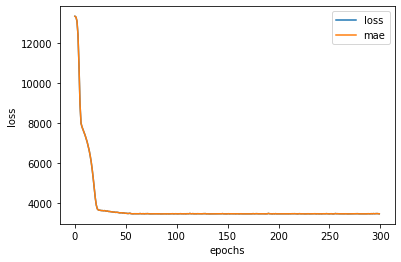

In [ ]:
# Plot history
pd.DataFrame(history_4.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
# Evaluation
_, mae_4 = model_4.evaluate(X_test_norm, y_test)
mae_4

9/9 [==============================] - 0s 2ms/step - loss: 3167.8384 - mae: 3167.8384


3167.83837890625

In [ ]:
# Compare the all four models performance
model_results = [mae , mae_2, mae_3, mae_4]

all_results = pd.DataFrame(model_results, columns=['MAE'], index=['Model 1', 'Model 2', 'Model 3', 'Model 4'])
all_results

,MAE
Model 1,3179.837402
Model 2,3174.941162
Model 3,3179.837402
Model 4,3167.838379


---
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [ ]:
# Import boston pricing data from tensorflow
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)

In [ ]:
train_features[0], test_features[0]

(array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]),
 array([2.1719e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
        5.8070e+00, 5.3800e+01, 3.6526e+00, 4.0000e+00, 2.7700e+02,
        1.8600e+01, 3.9094e+02, 1.6030e+01]))

In [ ]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

Create model as model_4

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
boston_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(100),
                                    tf.keras.layers.Dense(50),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Dense(1)
])

# Compile model
boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mae'])

# Fit the model
history = boston_model.fit(train_features, train_labels, epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 2ms/step - loss: 18.9942 - mae: 18.9942
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 10.1186 - mae: 10.1186
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 7.1464 - mae: 7.1464
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 7.4828 - mae: 7.4828
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 7.1872 - mae: 7.1872
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 6.5278 - mae: 6.5278
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 6.6576 - mae: 6.6576
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 6.2983 - mae: 6.2983
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 6.4336 - mae: 6.4336
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 7.2734 - mae: 7.2734
Epoch 11/300
13/13 [==============================] - 0

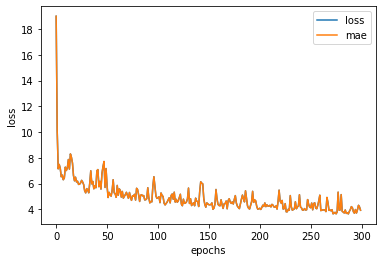

In [ ]:
# Plot history
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
# Evaluation
_, boston_mae = boston_model.evaluate(test_features, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 4.4669 - mae: 4.4669


Second model:
* Everything same but train for longer (500 epochs)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
boston_model_2 = tf.keras.Sequential([
                                    tf.keras.layers.Dense(100),
                                    tf.keras.layers.Dense(50),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Dense(1)
])

# Compile model
boston_model_2.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mae'])

# Fit the model (500 epochs)
history_2 = boston_model_2.fit(train_features, train_labels, epochs=500, verbose=0)

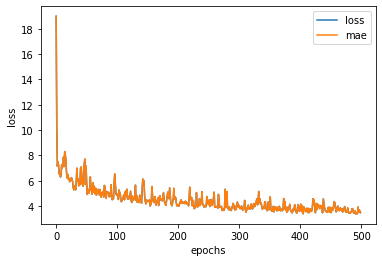

In [ ]:
# Plot history
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
# Evaluation
_, boston_mae_2 = boston_model_2.evaluate(test_features, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 3.1827 - mae: 3.1827


In [ ]:
# Compare results
model_results = {'MAE': [boston_mae, boston_mae_2]}

# Create DataFrame for comparison
boston_results = pd.DataFrame(model_results, index=['Model 1', 'Model 2'])
boston_results

,MAE
Model 1,4.466881
Model 2,3.182720
